In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
#data
bias=0.5
weight=0.1
X=torch.arange(0,1000,10).unsqueeze(1)
y=bias+weight*X

In [ ]:
#splitting the data into training and test
train_split=int(0.8*(len(X)))
train_split
X_train,Y_train=X[:train_split],y[:train_split]
X_test,Y_test=X[train_split:],y[train_split:]


In [ ]:
def plot_predictions(train_data,train_labels,test_data,test_labels,y_preds):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="g",s=4,label="training data")
  plt.scatter(test_data,test_labels,c="y",s=4,label="test data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, y_preds, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14});

In [ ]:
plot_predictions(X_train,Y_train,X_test,Y_test)


TypeError: plot_predictions() missing 1 required positional argument: 'y_preds'

In [ ]:
import pandas as pd

# Convert tensors to NumPy arrays and flatten if needed
X_train_np = X_train_np.flatten()
Y_train_np = Y_train_np.flatten()

# Create the DataFrame
df = pd.DataFrame({
    'X_train': X_train_np,
    'Y_train': Y_train_np
})

# Display the DataFrame
print(df)


NameError: name 'X_train_np' is not defined

In [ ]:
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,X:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)


In [ ]:
torch.manual_seed(42)
model=LR()
model,model.state_dict()

(LR(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
 #making code device agnostic
 model.to(device)

LR(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#creating a loss function and optimizer
loss_fn=nn.L1Loss()

# Create optimizer
optimizer = torch.optim.Adam(params=model.parameters())


In [ ]:
#training and testing loop
epochs=10000
for epoch in range(epochs):
  #model set to train mode
  model.train()
  #forward pass
  y_pred=model(X_train.float())
  #calculate the loss
  loss=loss_fn(y_pred,Y_train)
  # Zero grad optimizer
  optimizer.zero_grad()
  #Loss backward
  loss.backward()
  #Step the optimizer
  optimizer.step()

  #Testing
  model.eval() # put the model in evaluation mode for testing (inference)
  # 1. Forward pass
  with torch.inference_mode():
      test_pred = model(X_test.float())
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, Y_test)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 262.8227233886719 | Test loss: 594.1959838867188
Epoch: 100 | Train loss: 223.2232208251953 | Test loss: 504.59716796875
Epoch: 200 | Train loss: 183.62374877929688 | Test loss: 414.998291015625
Epoch: 300 | Train loss: 144.0242462158203 | Test loss: 325.39947509765625
Epoch: 400 | Train loss: 104.42781066894531 | Test loss: 235.80197143554688
Epoch: 500 | Train loss: 64.83251953125 | Test loss: 146.204833984375
Epoch: 600 | Train loss: 25.236345291137695 | Test loss: 56.60620880126953
Epoch: 700 | Train loss: 0.24039487540721893 | Test loss: 0.6535003781318665
Epoch: 800 | Train loss: 0.11698548495769501 | Test loss: 0.16385002434253693
Epoch: 900 | Train loss: 0.09692160785198212 | Test loss: 0.13663101196289062
Epoch: 1000 | Train loss: 0.07556027919054031 | Test loss: 0.10192642360925674
Epoch: 1100 | Train loss: 0.05293692275881767 | Test loss: 0.06895408779382706
Epoch: 1200 | Train loss: 0.029123391956090927 | Test loss: 0.041794586926698685
Epoch: 1300 | 

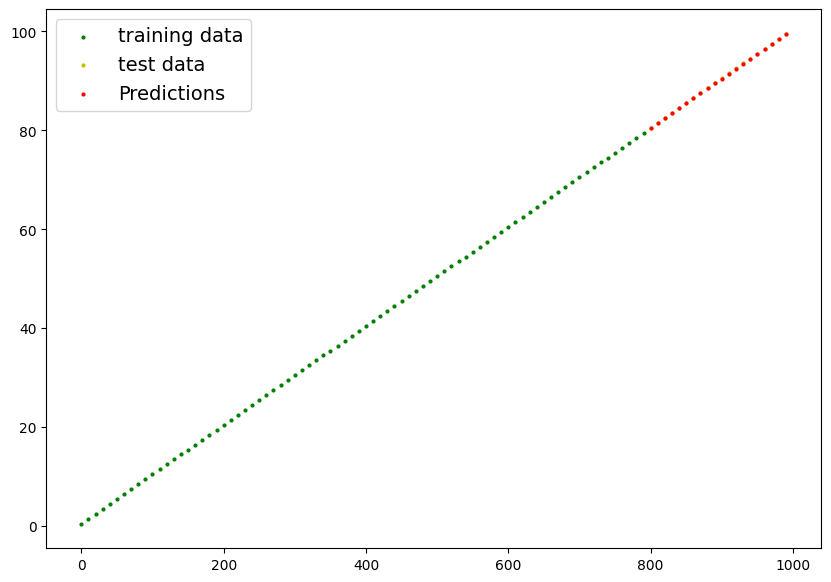

In [ ]:
plot_predictions(X_train,Y_train,X_test,Y_test,test_pred)